In [1]:
import logging
import os
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
import pykeen
from sklearn.decomposition import PCA

In [2]:
%matplotlib inline

In [3]:
logging.basicConfig(level=logging.INFO)
logging.getLogger('pykeen').setLevel(logging.INFO)

In [4]:
print(sys.version)

3.7.1 (default, Nov  6 2018, 18:45:35) 
[Clang 10.0.0 (clang-1000.11.45.5)]


In [5]:
print(time.asctime())

Tue Apr  2 15:54:05 2019


In [6]:
print(pykeen.get_version())

0.0.22


In [7]:
output_directory = os.path.join(
    os.path.expanduser('~'), 
    'Desktop', 
    'pykeen_test'
)

In [8]:
config = dict(
    # Use Signor (see: http://www.ndexbio.org/#/network/b0d987cb-1e6b-11e8-b939-0ac135e8bacf)
    training_set_path           = 'ndex:b0d987cb-1e6b-11e8-b939-0ac135e8bacf',
    execution_mode              = 'Training_mode',
    random_seed                 = 0,
    hpo_mode                    = True,
    maximum_number_of_hpo_iters = 50,
    kg_embedding_model_name     = 'TransE',
    embedding_dim               = 10,
    normalization_of_entities   = 2,  # corresponds to L2
    scoring_function            = 1,  # corresponds to L1
    margin_loss                 = 8,
    learning_rate               = 0.01,
    num_epochs                  = 25,  # 1000 is better for real
    batch_size                  = 32,
)

results = pykeen.run(
    config=config,
    output_directory=output_directory,
)

INFO:pykeen.utilities.handlers:downloading b0d987cb-1e6b-11e8-b939-0ac135e8bacf from ndex
/Users/mehdi/virtual_envs/pykeen_python_3_7/lib/python3.7/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))
INFO:pykeen.utilities.pipeline:-------------Train KG Embeddings-------------
Training epoch: 100%|██████████| 25/25 [00:20<00:00,  1.26it/s]


In [9]:
results.results.keys()

odict_keys(['trained_model', 'losses', 'entity_to_embedding', 'relation_to_embedding', 'entity_to_id', 'relation_to_id', 'final_configuration'])

In [10]:
results.results['trained_model']

TransE(
  (criterion): MarginRankingLoss()
  (entity_embeddings): Embedding(4969, 10)
  (relation_embeddings): Embedding(12, 10)
)

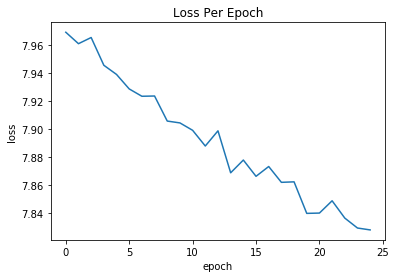

In [11]:
losses = results.results['losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

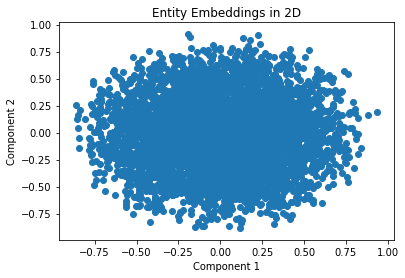

In [12]:
pca = PCA(n_components=2)
X = np.array(list(results.results['entity_to_embedding'].values()))
X_red = pca.fit_transform(X)

plt.title('Entity Embeddings in 2D')
plt.scatter(X_red[::,0], X_red[::,1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

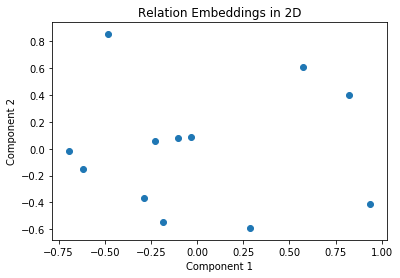

In [13]:
pca = PCA(n_components=2)
X = np.array(list(results.results['relation_to_embedding'].values()))
X_red = pca.fit_transform(X)

plt.title('Relation Embeddings in 2D')
plt.scatter(X_red[::,0], X_red[::,1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()